<a href="https://colab.research.google.com/github/abdallaho98/AutoSpeech/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install ktrain

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [ ]:
import ktrain
from ktrain import text

In [ ]:
import pandas as pd
filepath = 'legalts.txt'
df = pd.DataFrame(columns=('type', 'content'))
with open(filepath) as fp:
   line = fp.readline()
   cnt = 0
   while line:
       x = line.strip().split("  ")
       df.loc[cnt] = [int(x[1]) , x[0]]
       line = fp.readline()
       cnt += 1
df['type'] = df['type'].apply(lambda x: 'right' if x == 1 else 'permit' if x == 2 else 'obligation' if x == 3 else 'prohibition' if x == 4 else 'other')
df.columns = ['label', 'text']
df = pd.concat([df, df.label.astype('str').str.get_dummies()], axis=1, sort=False)
df = df[['text', 'right', 'permit','obligation' ,'prohibition' , 'other']]
df.head()

,text,right,permit,obligation,prohibition,other
0,ليس للشركاء في مال شائع أن يطلبوا قسمته إذا تب...,0,0,0,1,0
1,إذا وقع تحريف في نص السفتجة فالأشخاص الموقعون ...,0,0,0,0,1
2,يجوز الحجز على الأجر أو المرتب بقيمة النفقة ال...,0,1,0,0,0
3,يعين القاضي طبقا لأحكام قانون الأسرة، مقدما من...,0,0,1,0,0
4,يجوز للعموم المعارضة في أي تصحيح قضائي أو إدار...,0,1,0,0,0


In [106]:
import pandas as pd
import snowballstemmer
import re
import string
ar_light_stem = snowballstemmer.stemmer('arabic') 
filepath = 'legalts.txt'
df = pd.DataFrame(columns=('type', 'content'))
with open(filepath) as fp:
   line = fp.readline()
   cnt = 0
   while line:
       x = line.strip().split("  ")
       result = re.sub(r'[0-9,.()،]+', '', x[0])
       listStrin = [ar_light_stem.stemWord(text) for text in result.split(' ')]
       strin = ' '.join(listStrin)
       df.loc[cnt] = [int(x[1]) , strin]
       line = fp.readline()
       cnt += 1
df['type'] = df['type'].apply(lambda x: 'right' if x == 1 else 'permit' if x == 2 else 'obligation' if x == 3 else 'prohibition' if x == 4 else 'other')
df.columns = ['label', 'text']
df = pd.concat([df, df.label.astype('str').str.get_dummies()], axis=1, sort=False)
df = df[['text', 'right', 'permit','obligation' ,'prohibition' , 'other']]
df.head()

,text,right,permit,obligation,prohibition,other
0,ليس شركاء في مال شايع ان يطلب قسم اذا تبين من ...,0,0,0,1,0
1,اذا وقع تحريف في نص سفتج فالاشخاص موقع علي بعد...,0,0,0,0,1
2,يجوز حجز علي اجر او مرتب قيم نفق غذاء اذا كان ...,0,1,0,0,0
3,يعين قاض طبق لاحكام قانون اسر مقدم من بين اقار...,0,0,1,0,0
4,يجوز عموم معارض في اي تصحيح قضاء او ادار لعقد ...,0,1,0,0,0


In [107]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df, 
                                                                   'text', # name of column containing review text
                                                                   label_columns=['right', 'permit','obligation' ,'prohibition' , 'other'],
                                                                   maxlen=1000, 
                                                                   max_features=100000,
                                                                   preprocess_mode='standard',
                                                                   val_pct=0.01,
                                                                   ngram_range=5)


language: ar
Word Counts: 3545
Nrows: 1024
1024 train sequences
train sequence lengths:
	mean : 27
	95percentile : 47
	99percentile : 60
Adding 5-gram features
max_features changed to 183161 with addition of ngrams
Average train sequence length with ngrams: 123
train (w/ngrams) sequence lengths:
	mean : 123
	95percentile : 225
	99percentile : 290
x_train shape: (1024,1000)
y_train shape: (1024, 5)
Is Multi-Label? False
11 test sequences
test sequence lengths:
	mean : 26
	95percentile : 48
	99percentile : 48
Average test sequence length with ngrams: 49
test (w/ngrams) sequence lengths:
	mean : 50
	95percentile : 96
	99percentile : 103
x_test shape: (11,1000)
y_test shape: (11, 5)


In [110]:
model = text.text_classifier('nbsvm', (x_train, y_train) , preproc=preproc)
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=8)

Is Multi-Label? False
compiling word ID features...
maxlen is 1000
building document-term matrix... this may take a few moments...
rows: 1-1024
computing log-count ratios...
done.


simulating training for different learning rates... this may take a few moments...
Train on 1024 samples
Epoch 1/1024
1024/1024 [==============================] - 1s 951us/sample - loss: 1.6107 - accuracy: 0.3232
Epoch 2/1024
1024/1024 [==============================] - 1s 644us/sample - loss: 1.6102 - accuracy: 0.3301
Epoch 3/1024
1024/1024 [==============================] - 1s 641us/sample - loss: 1.6082 - accuracy: 0.3477
Epoch 4/1024
1024/1024 [==============================] - 1s 652us/sample - loss: 1.6012 - accuracy: 0.4111
Epoch 5/1024
1024/1024 [==============================] - 1s 673us/sample - loss: 1.5761 - accuracy: 0.6357
Epoch 6/1024
1024/1024 [==============================] - 1s 660us/sample - loss: 1.4901 - accuracy: 0.9014
Epoch 7/1024
1024/1024 [==============================] - 1s 635us/sample - loss: 1.2376 - accuracy: 0.9678
Epoch 8/1024
1024/1024 [==============================] - 1s 650us/sample - loss: 0.7468 - accuracy: 0.9854
Epoch 9/1024
1024/1024 [=======

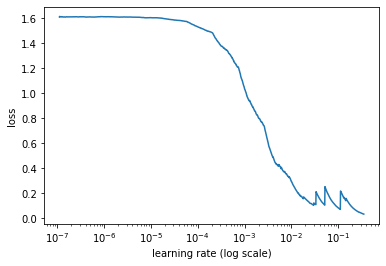

In [111]:
learner.lr_find(show_plot=True)

In [112]:
learner.autofit(2e-3, 1)



begin training using triangular learning rate policy with max lr of 0.002...
Train on 1024 samples, validate on 11 samples
1024/1024 [==============================] - 1s 1ms/sample - loss: 1.2919 - accuracy: 0.7656 - val_loss: 1.0537 - val_accuracy: 0.9091


In [113]:
learner.view_top_losses(n=3, preproc=preproc)

----------
id:1 | loss:1.47 | true:prohibition | pred:obligation)

يمنع علي محجوز لدي وفاء من مبالغ محجوز للمد محجوز علي من تاريخ توقيع حجز


In [114]:
p = ktrain.get_predictor(learner.model, preproc)

In [115]:
p.predict("لا يجوز أن يكون تأويل العبارات الغامضة في عقود الاذعان ضارا بمصلحة الطرف المذعن")

'prohibition'

In [116]:
p.predict("يمنع إبطال العقد إذا لم يتمسك به صاحبه خلال خمس )5( سنوات.")

'prohibition'

In [117]:
p.predict("يجوز أن يؤمر بالنفاذ المعجل بالنسبة لهذا الإجرا")

'permit'

In [118]:
p.predict("يجوز تخفيض العقوبة المنصوص عليها قانونا بالنسبة للشخص الطبيعي الذي قضي بإدانته وتقررت إفادته بظروف مخففة")

'permit'

In [133]:
p.save('/content/predictor')

In [135]:
predictor = ktrain.load_predictor('/content/predictor')

In [142]:
predictor.predict("يمنع إبطال العقد إذا لم يتمسك به صاحبه خلال خمس )5( سنوات.")

'prohibition'

In [144]:
!zip -r /content/file.zip /content/predictor

  adding: content/predictor/ (stored 0%)
  adding: content/predictor/tf_model.h5 (deflated 81%)
  adding: content/predictor/tf_model.preproc (deflated 44%)
